### Requests

In [ ]:
import ...

response = ...('https://xkcd.com/869')


In [ ]:
from bs4 import BeautifulSoup

doc = ...(..., 'lxml')
print('\n'.join(
    doc.prettify().splitlines()[0:10]
    ))

In [ ]:
img = ...
img

In [ ]:
from textwrap import fill

print(fill(img['title'], width = 42))

### HTML Table

In [ ]:
import ...

acs5_variables = ...(
    'https://api.census.gov/data/2016/acs/acs5/variables.html'
    )
vars = acs5_variables[0]
vars.head()

In [ ]:
rows = (
    ...
    ...(
        'household income',
        na = False,
        )
    )
for idx, row in ...:
    print('{}:\t{}'.format(row['Name'], row['Label']))

### REST API

In [ ]:
... = 'https://api.census.gov/data/2016/acs5'
... = {
  'get': 'NAME,AIANHH',
  'for': ...,
  ...,
}
response = ...
response

In [ ]:
for ... in ...:
    print('{}: {}'.format(...))

In [ ]:
data = pd....(...)
data

### Specialized Packages

In [1]:
from census import Census

...
c = Census(key, ...)
c.acs5

In [2]:
variables = ('NAME', 'B19013_001E')

In [12]:
response = c.acs5.state_county_tract(
    ...,
    ...,
    ...,
    ...,
    )
response[0]

{'NAME': 'Census Tract 1, Allegany County, Maryland',
 'B19013_001E': 42292.0,
 'state': '24',
 'county': '001',
 'tract': '000100'}

In [33]:
df = pd.DataFrame(...)
mask = df['B19013_001E'] == -666666666.0
df = df.loc[~mask, :]

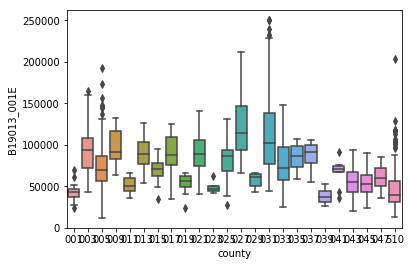

In [36]:
import seaborn as sns

sns.boxplot(
  data = df,
  x = 'county',
  y = 'B19013_001E',
)

### Response Stashing

In [ ]:
import requests
from api_key import API_KEY

api = 'https://api.data.gov/regulations/v3/'
path = 'document.json'
query = {
    'documentId':'DOI-2017-0002-0001',
    'api_key':...,
    }
response = requests.get(
    ...,
    params=query)

In [ ]:
doc = ...
print('{}: {}'.format(
    doc['numItemsRecieved']['label'],
    doc['numItemsRecieved']['value'],
))

In [ ]:
query = {
    'dktid': doc['docketId']['value'],
    'dct': 'PS',
    'api_key': API_KEY,
    }
path = ...
response = requests.get(api + path, params=query)
dkt = response.json()

In [ ]:
print('Number received: {}\nTotal number: {}'.format(
    len(dkt['documents']),
    dkt['totalNumRecords'],
))

In [ ]:
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine

... = declarative_base()

In [ ]:
from sqlalchemy import Column, Integer, Text

class Comment(...):
    __tablename__ = 'comment'
    
    ... = Column(Integer, primary_key=True)
    ... = Column(Text)

In [ ]:
engine = create_engine(...)
Session = sessionmaker(bind=engine)

Base.metadata.create_all(engine)

In [ ]:
query['rpp'] = 10

In [ ]:
for i in range(0, 15):
    # query api
    query['po'] = i * query['rpp']
    print(query['po'])
    response = requests.get(api + path, params=query)
    
    # extract values
    page = response.json()
    docs = page['documents']
    values = [{'comment': doc['commentText']} for doc in docs]
    
    # load into database
    insert = Comment.__table__.insert().values(values)
    engine.execute(insert)

In [ ]:
df = pd....('comment', engine)

In [ ]:
engine.dispose()